In [1]:
import json
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df_2010 = pd.read_csv('elon_musk/2010.csv')
df_2011 = pd.read_csv('elon_musk/2011.csv')
df_2012 = pd.read_csv('elon_musk/2012.csv')
df_2013 = pd.read_csv('elon_musk/2013.csv')
df_2014 = pd.read_csv('elon_musk/2014.csv')
df_2015 = pd.read_csv('elon_musk/2015.csv')
df_2016 = pd.read_csv('elon_musk/2016.csv')
df_2017 = pd.read_csv('elon_musk/2017.csv')
df_2018 = pd.read_csv('elon_musk/2018.csv')
df_2019 = pd.read_csv('elon_musk/2019.csv')
df_2020 = pd.read_csv('elon_musk/2020.csv')
df_2021 = pd.read_csv('elon_musk/2021.csv')
df_2022 = pd.read_csv('elon_musk/2022.csv')

In [4]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


In [8]:
df_2010

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,15434727182,15434727182,1.275676e+12,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [6]:
df_tweets.shape

(34878, 44)

In [7]:
df_tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever) http://t.co/pgNEJsjI,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. http://t.co/r8qfluIG",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_tweets_new = df_tweets[["date","tweet"]]

In [10]:
df_tweets_new.head()

,date,tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me."
0,2011-12-28 22:27:08,@TheOnion So true :)
1,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever) http://t.co/pgNEJsjI
2,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k
3,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. http://t.co/r8qfluIG"


In [12]:
df_tweets_new['date_new'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head(20)

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,tweet,date_new
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
0,2011-12-28 22:27:08,@TheOnion So true :),2011-12-28
1,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever) http://t.co/pgNEJsjI,2011-12-27
2,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,2011-12-26
3,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. http://t.co/r8qfluIG",2011-12-26
4,2011-12-26 15:45:18,"Met with UNICEF, Doctors Without Borders and Artists for Peace & Justice. I support them and would recommend others do too.",2011-12-26
5,2011-12-26 15:23:40,Just returned from a trip to Haiti. Covered a lot of ground and saw many tough situations. They need a lot of help.,2011-12-26
6,2011-12-26 15:05:19,Single character Tweets are the ulitmate extension of the Twitmeme...,2011-12-26
7,2011-12-26 04:06:06,I,2011-12-26
8,2011-12-24 01:41:33,The Russians are having some challenges with their rockets. Too many of the engineers that designed them have retired: http://t.co/rEs7spSU,2011-12-24


In [15]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,tweet,date_new
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
1,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
2,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
3,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
4,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
5,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
6,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
7,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
8,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
9,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04


In [16]:
df_tweets_new.shape

(34878, 3)

#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [24]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,date,tweet,date_new
1,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
2,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
3,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
4,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
5,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
6,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
7,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
8,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
9,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",2010-06-04
11,2011-12-01 09:55:11,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT",2011-12-01


In [28]:
#Drop duplicate records from the dataframe and reset the index
temp = df_tweets_new.drop_duplicates(keep='first')
temp.reset_index(drop=True, inplace=True)
temp.head(15)

(15346, 3)


In [29]:
print(temp.shape)

(15346, 3)


#### After dropping the duplicate records we see that only half of the records remain

In [30]:
import re
index=0
for index,row in temp.iterrows():
    stre=row["tweet"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp.at[index,'date_new'] = row["date_new"]
    temp.at[index,'tweet'] = my_new_string
    index=index+1
    
    
df_tweets_final = temp.groupby(['date_new'], as_index = False).agg({'tweet': ''.join}, Inplace=True)

In [31]:
df_tweets_final.head()

,date_new,tweet
0,2010-06-04,Please ignore prior tweets as that was someone pretending to be me This is actually me
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ice No not the country Vlads rink in Van Nuys Awesome family fun httptcorBQXJ9ITI made the volume on the Model S httptcowMCnT53M go to 11 Now I just need to work in a miniature Stonehenge
2,2011-12-03,Great Voltaire quote arguably better than Twain Hearing news of his own death Voltaire replied the reports were true only prematureThat was a total non sequitur btw
3,2011-12-04,Am reading a great biography of Ben Franklin by Isaacson Highly recommended
4,2011-12-21,Read Lying the new book by my friend Sam Harris Excellent cover art and lots of good reasons not to lieSam Harris also wrote a nice piece on the awesomeness of Hitchens httptcofPkLiK3v May the good man RIPWhy does the crowd cry over the glorious leader Kim Il Sungs death Fear of being shot may play a role httptcohoQrYtG1His singing and acting talent will be sorely missed httptcoIIFKob75 South Park sequel coming soonGot called randomly by Kanye West today and received a download of his thoughts ranging from shoes to Moses He was polite but opaqueYeah this really is me as my Mom mayemusk will attest Not sure I can handle just doing 140 char missives Will put longer thoughts on GYum Even better than deep fried butter httptcoOdy21NuD


In [32]:
df_tweets_final.shape

(2337, 2)

### Filter the tweets containing the word "doge"

In [34]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_doge = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'doge' in cur:
        df_doge = df_doge.append({'Date' : df_tweets_final.loc[i].date_new, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_doge['Date'] = pd.to_datetime(df_doge['Date'], format='%Y-%m-%d')
df_doge

,Date,Tweet
0,2019-04-02,TrevMcKendrick Nouniversalsci What could possibly go wrongklodua universalsci Some challenges with ice formation in the cryogenic propellant prevalves Hopefully overcome soonYupTomHeats Dogecoin might be my fav cryptocurrency Its pretty cooldogecoin Uh ohDogecoin rulz httpstcoflWWUgAgLUDogecoin value may vary httpstcoUWerAhPv63
1,2020-04-25,alexanderbittan shelbiestrykers YesRenataKonkoly YesPPathole alexanderbittan shelbiestrykers Not saying new Giga will be in Texas but Cybertruck will be produced there wherever it is as Fremont is at max capacityKristennetten PPathole alexanderbittan shelbiestrykers Needs to be more than halfway to east coastDMCRyan RenataKonkoly Sure we can probably do an update later this yearcleantechnica Many talented engineers are working on FSD at Tesla What matters is solving vision at high frame rate in our compute space with low latency between camera frame amp actuationthirdrowtesla cleantechnica Definitelyjgrano305 thirdrowtesla cleantechnica Progress is goodPPathole Pretty much Being better than human drivers on average is not a super high standard Autonomy will probably be held to a 300 to 1000 higher safety requirement longtermRenataKonkoly Erdayastronaut SpaceX Its also because of the Spitfire engine amp wizardjhcsquared AlexBrendel2 Erdayastronaut As usual for most things building production system for Raptor is gt1000 harder than designing itPPathole Great labeling tools amp talented human labelers really matter It really is a skilled profession Importance of good tools amp infrastructure is underratedBocaChicaGal NASASpaceflight These wont be strictly coupled to ship serial number Might be on SN5 or might just be used as a manufacturing pathfinderbrendan2908 BocaChicaGal NASASpaceflight Improved process I was referring to was cylinder to cylinder circumferential welds to improve cycle time amp reduce pucker Those are still working their way through productionSo often true httpstcoqxmDtZ4Bufjustpaulinelol That basically describes SoC 0 vs SoC 1 of our FSD computer right now Soon to changeyourfavgas justpaulinelol No good chance of RUD rapid unscheduled disassembly event but landing pad is separated from launch padCBSNewYork AielloTV Heard same from doc I trustharshairugu PPathole CBSNewYork AielloTV Great28delayslater justpaulinelol Dogecoin ModeSamTalksTesla 28delayslater justpaulinelol Romance Mode httpstconc735SsMpM
2,2020-07-18,ThankswintonARK We better hustle with Neuralink Not moving fast enoughModelYendofICE wintonARK Pretty muchWill those who write the algorithms ever realize their negativity biasizzynobre Excuse me I only sell DogeIts inevitable httpstcoeBKnQm6QyFPPathole Summarizes pretty much every biz school case studyserhatserhatst ManyIf youve solved hard problems with phones wearables sealing signal processing inductive charging power mgmt etc please consider working at engineeringneuralinkcomSolving highvolume highreliability lowcost production problems is especially valuedPPathole No prior neuroscience background is required This is primarily an electricalelectronic chip designmechanicalsoftware engineering problem for the Link itself amp the surgical robotflcnhvy Yesm4ttwegner flcnhvy How come Hulk never loses pantsm4ttwegner flcnhvy BDEm4ttwegner flcnhvy
3,2020-11-17,PPathole michaelminalab YesErdayastronaut rweb11742 Damn thats not easy I spent quite a bit of time looking at RussianUkrainian engines Theyre goodtrylolli MaisieWilliams httpstcoUWerAhxUevjack Well saidJohnnaCrider1 timmerenginerd jack Fate IronyChrisGNSF Special permission received from Stonecutters Guild httpstcoSW5RBm1sRBGreenIsClutch JohnnaCrider1 timmerenginerd jack Theyre on their way Hopefully more Teslaquila next monthbillhuang688 JohnnaCrider1 timmerenginerd jack Maybe I just love irony hahaErdayastronaut CharlesNOtrumps rweb11742 Our first Merlin engine design was really bad tbh Nothing worked well amp some parts didnt work at all 18 years later amp thousands of upgrades ma

In [35]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_spaceX= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'space' in cur:
        df_spaceX = df_spaceX.append({'Date' : df_tweets_final.loc[i].date_new, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_spaceX['Date'] = pd.to_datetime(df_spaceX['Date'], format='%Y-%m-%d')
df_spaceX

,Date,Tweet
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today httptco6z7gHBn6We had a long and interesting conversation on many subjects He has exciting ideas for extending his creative talents beyond musicThe Russians are having some challenges with their rockets Too many of the engineers that designed them have retired httptcorEs7spSU
1,2011-12-30,Am reading Robert Massies book on Catherine the Great Yeah I know what youre probably thinking did she really f a horseSew one button doesnt make u a tailor cook one meal doesnt make u a chef but f one horse and u r a horsefer for all of historyIm just saying that u shouldnt pass judgment based on one night of passion Sometimes things just happen and u go with the moment Right mood scented candles Barry White singing Cant Get Enough of Your Love Baby and the magic by that I mean horsefing happens To be clear CtG absolutely did not bang her horse They were just close friends who liked to take showers together and spoon at nightChina unveils ambitious space strategy httptcoudHmuft2SpaceX has Boeing Lockheed Europe Ariane and Russia ProtonSoyuz near checkmate in rocket technology End game is all about ChinaNot that this really matters All current rocket tech including ours sucks Only when it becomes fully reusable will it not suck
2,2012-01-06,Feb is huge month Model X world premier and public reveal of our LA design studio on the 9th Stay tuned for more detailsNext month is also when our Dragon spaceship docks with the Space Station for the first time Major pucker factorModel S Signature series sold out as of today httpstcopKbR0ziP
3,2012-01-24,Strongest solar radiation storm in 7 years is blasting Earth This huge eruption hits us tomorrow httptcoVF3gTu3LDesign completed for bringing rocket back to launchpad using only thrusters Yay Wings r just dead weight in spaceRough cut simulation of the SpaceX next gen rocket spaceship design httptcocKBviQne
4,2012-01-31,The SpaceX theme song by Total Ghost is just too good ooh ooh ooh httptcoBuKuopI5
...,...,...
746,2022-02-25,DriveTeslaca Weve had about 60 or so cars testing internally in Canada Hoping to go wider this weekendmoxie Are you sure Signal is secureA7imd Me tooteslaownersSV moxie Just iMessage amp SignalGfilche Hollywood refuses to write even one story about an actual company startup where the CEO isnt a dweeb andor evilSpaceX Successful Starlink deploy httpstcoChUh6JWaQdvgdunkey moxie Signal is the least insecure messaging serviceWholeMarsBlog LIDAR is a seductive local maximum SpaceX designed amp built them to dock with ISS However the road system was designed to work with biological neural nets amp eyes so a general solution to selfdriving necessarily will require silicon neural nets amp cameras Realworld AIICannotEnough WholeMarsBlog moxie Actual question not rhetoricalSciGuySpace YesCryptoWhale Gfilche Protagonists created over half a century ago dont countteslaownersSV SpaceX Starlink is a little patchy to Tonga right now but will improve dramatically as laser intersatellite links activate
747,2022-02-26,SpacePete Good threadtes1m211 Rogozin YesRogozin httpstco4kRJyp0FOvdlauer Would be a good move Needs to include put options amp synthetic shorts
748,2022-03-02,WholeMarsBlog Teslarati KlenderJoey Saudi Arabia owns 23 of Lucid so inevitableTeslarati KlenderJoey Their negative gross margin will be staggeringICannotEnough Model3Owners Swipe down on navigate button to navigate home or to work if at homeRealLifeLore22 Pretty good summary although national pride is underweighted relative to economics Latter serves former not other way around The foundational issue imo which this video doesnt ignore is low birth rate After all what good is land with no peopleWholeMarsBlog He plays golf a lotFedorovMykhailo BrianJBerger SpaceX SpaceXStarlink Honda ChampionGen westinghouse DuroMaxPower Solar panels battery pack better than generator as no heat signature or smoke amp doesnt run out of fuelWholeMarsBlog We couldve made a 60

In [36]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_tesla= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'space' in cur:
        df_tesla = df_tesla.append({'Date' : df_tweets_final.loc[i].date_new, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_tesla['Date'] = pd.to_datetime(df_tesla['Date'], format='%Y-%m-%d')
df_tesla

,Date,Tweet
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today httptco6z7gHBn6We had a long and interesting conversation on many subjects He has exciting ideas for extending his creative talents beyond musicThe Russians are having some challenges with their rockets Too many of the engineers that designed them have retired httptcorEs7spSU
1,2011-12-30,Am reading Robert Massies book on Catherine the Great Yeah I know what youre probably thinking did she really f a horseSew one button doesnt make u a tailor cook one meal doesnt make u a chef but f one horse and u r a horsefer for all of historyIm just saying that u shouldnt pass judgment based on one night of passion Sometimes things just happen and u go with the moment Right mood scented candles Barry White singing Cant Get Enough of Your Love Baby and the magic by that I mean horsefing happens To be clear CtG absolutely did not bang her horse They were just close friends who liked to take showers together and spoon at nightChina unveils ambitious space strategy httptcoudHmuft2SpaceX has Boeing Lockheed Europe Ariane and Russia ProtonSoyuz near checkmate in rocket technology End game is all about ChinaNot that this really matters All current rocket tech including ours sucks Only when it becomes fully reusable will it not suck
2,2012-01-06,Feb is huge month Model X world premier and public reveal of our LA design studio on the 9th Stay tuned for more detailsNext month is also when our Dragon spaceship docks with the Space Station for the first time Major pucker factorModel S Signature series sold out as of today httpstcopKbR0ziP
3,2012-01-24,Strongest solar radiation storm in 7 years is blasting Earth This huge eruption hits us tomorrow httptcoVF3gTu3LDesign completed for bringing rocket back to launchpad using only thrusters Yay Wings r just dead weight in spaceRough cut simulation of the SpaceX next gen rocket spaceship design httptcocKBviQne
4,2012-01-31,The SpaceX theme song by Total Ghost is just too good ooh ooh ooh httptcoBuKuopI5
...,...,...
746,2022-02-25,DriveTeslaca Weve had about 60 or so cars testing internally in Canada Hoping to go wider this weekendmoxie Are you sure Signal is secureA7imd Me tooteslaownersSV moxie Just iMessage amp SignalGfilche Hollywood refuses to write even one story about an actual company startup where the CEO isnt a dweeb andor evilSpaceX Successful Starlink deploy httpstcoChUh6JWaQdvgdunkey moxie Signal is the least insecure messaging serviceWholeMarsBlog LIDAR is a seductive local maximum SpaceX designed amp built them to dock with ISS However the road system was designed to work with biological neural nets amp eyes so a general solution to selfdriving necessarily will require silicon neural nets amp cameras Realworld AIICannotEnough WholeMarsBlog moxie Actual question not rhetoricalSciGuySpace YesCryptoWhale Gfilche Protagonists created over half a century ago dont countteslaownersSV SpaceX Starlink is a little patchy to Tonga right now but will improve dramatically as laser intersatellite links activate
747,2022-02-26,SpacePete Good threadtes1m211 Rogozin YesRogozin httpstco4kRJyp0FOvdlauer Would be a good move Needs to include put options amp synthetic shorts
748,2022-03-02,WholeMarsBlog Teslarati KlenderJoey Saudi Arabia owns 23 of Lucid so inevitableTeslarati KlenderJoey Their negative gross margin will be staggeringICannotEnough Model3Owners Swipe down on navigate button to navigate home or to work if at homeRealLifeLore22 Pretty good summary although national pride is underweighted relative to economics Latter serves former not other way around The foundational issue imo which this video doesnt ignore is low birth rate After all what good is land with no peopleWholeMarsBlog He plays golf a lotFedorovMykhailo BrianJBerger SpaceX SpaceXStarlink Honda ChampionGen westinghouse DuroMaxPower Solar panels battery pack better than generator as no heat signature or smoke amp doesnt run out of fuelWholeMarsBlog We couldve made a 60

### Sentiment Analysis

In [ ]:
# pip install spacytextblob

In [ ]:
# pip install wordcloud

In [37]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create 2 new columns
df_doge["subjectivity"] = df_doge["Tweet"].apply(getSubjectivity)
df_doge["polarity"] = df_doge["Tweet"].apply(getPolarity)

In [40]:
df_doge.head(15)

,Date,Tweet,subjectivity,polarity
0,2019-04-02,TrevMcKendrick Nouniversalsci What could possibly go wrongklodua universalsci Some challenges with ice formation in the cryogenic propellant prevalves Hopefully overcome soonYupTomHeats Dogecoin might be my fav cryptocurrency Its pretty cooldogecoin Uh ohDogecoin rulz httpstcoflWWUgAgLUDogecoin value may vary httpstcoUWerAhPv63,1.000000,0.125000
1,2020-04-25,alexanderbittan shelbiestrykers YesRenataKonkoly YesPPathole alexanderbittan shelbiestrykers Not saying new Giga will be in Texas but Cybertruck will be produced there wherever it is as Fremont is at max capacityKristennetten PPathole alexanderbittan shelbiestrykers Needs to be more than halfway to east coastDMCRyan RenataKonkoly Sure we can probably do an update later this yearcleantechnica Many talented engineers are working on FSD at Tesla What matters is solving vision at high frame rate in our compute space with low latency between camera frame amp actuationthirdrowtesla cleantechnica Definitelyjgrano305 thirdrowtesla cleantechnica Progress is goodPPathole Pretty much Being better than human drivers on average is not a super high standard Autonomy will probably be held to a 300 to 1000 higher safety requirement longtermRenataKonkoly Erdayastronaut SpaceX Its also because of the Spitfire engine amp wizardjhcsquared AlexBrendel2 Erdayastronaut As usual for most things building production system for Raptor is gt1000 harder than designing itPPathole Great labeling tools amp talented human labelers really matter It really is a skilled profession Importance of good tools amp infrastructure is underratedBocaChicaGal NASASpaceflight These wont be strictly coupled to ship serial number Might be on SN5 or might just be used as a manufacturing pathfinderbrendan2908 BocaChicaGal NASASpaceflight Improved process I was referring to was cylinder to cylinder circumferential welds to improve cycle time amp reduce pucker Those are still working their way through productionSo often true httpstcoqxmDtZ4Bufjustpaulinelol That basically describes SoC 0 vs SoC 1 of our FSD computer right now Soon to changeyourfavgas justpaulinelol No good chance of RUD rapid unscheduled disassembly event but landing pad is separated from launch padCBSNewYork AielloTV Heard same from doc I trustharshairugu PPathole CBSNewYork AielloTV Great28delayslater justpaulinelol Dogecoin ModeSamTalksTesla 28delayslater justpaulinelol Romance Mode httpstconc735SsMpM,0.456694,0.229180
2,2020-07-18,ThankswintonARK We better hustle with Neuralink Not moving fast enoughModelYendofICE wintonARK Pretty muchWill those who write the algorithms ever realize their negativity biasizzynobre Excuse me I only sell DogeIts inevitable httpstcoeBKnQm6QyFPPathole Summarizes pretty much every biz school case studyserhatserhatst ManyIf youve solved hard problems with phones wearables sealing signal processing inductive charging power mgmt etc please consider working at engineeringneuralinkcomSolving highvolume highreliability lowcost production problems is especially valuedPPathole No prior neuroscience background is required This is primarily an electricalelectronic chip designmechanicalsoftware engineering problem for the Link itself amp the surgical robotflcnhvy Yesm4ttwegner flcnhvy How come Hulk never loses pantsm4ttwegner flcnhvy BDEm4ttwegner flcnhvy,0.576282,0.123718
3,2020-11-17,PPathole michaelminalab YesErdayastronaut rweb11742 Damn thats not easy I spent quite a bit of time looking at RussianUkrainian engines Theyre goodtrylolli MaisieWilliams httpstcoUWerAhxUevjack Well saidJohnnaCrider1 timmerenginerd jack Fate IronyChrisGNSF Special permission received from Stonecutters Guild httpstcoSW5RBm1sRBGreenIsClutch JohnnaCrider1 timmerenginerd jack Theyre on their way Hopefully more Teslaquila next monthbillhuang688 JohnnaCrider1 timmerenginerd jack Maybe I just love irony hahaErdayastronaut CharlesNOtrumps rweb11742 Our first Merlin engine design was really bad tbh Nothing worked well 

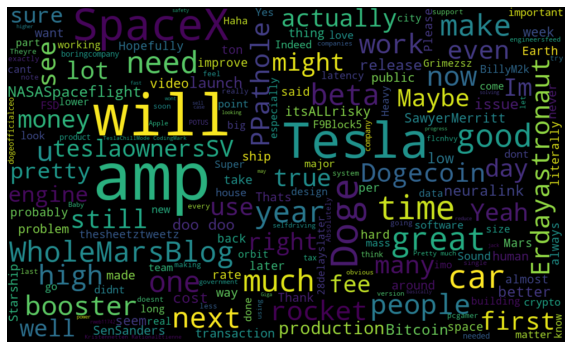

In [42]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [43]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df_doge['Sentiment'] = df_doge['polarity'].apply(getAnalysis)
df_doge

,Date,Tweet,subjectivity,polarity,Sentiment
0,2019-04-02,TrevMcKendrick Nouniversalsci What could possibly go wrongklodua universalsci Some challenges with ice formation in the cryogenic propellant prevalves Hopefully overcome soonYupTomHeats Dogecoin might be my fav cryptocurrency Its pretty cooldogecoin Uh ohDogecoin rulz httpstcoflWWUgAgLUDogecoin value may vary httpstcoUWerAhPv63,1.000000,0.125000,Positive
1,2020-04-25,alexanderbittan shelbiestrykers YesRenataKonkoly YesPPathole alexanderbittan shelbiestrykers Not saying new Giga will be in Texas but Cybertruck will be produced there wherever it is as Fremont is at max capacityKristennetten PPathole alexanderbittan shelbiestrykers Needs to be more than halfway to east coastDMCRyan RenataKonkoly Sure we can probably do an update later this yearcleantechnica Many talented engineers are working on FSD at Tesla What matters is solving vision at high frame rate in our compute space with low latency between camera frame amp actuationthirdrowtesla cleantechnica Definitelyjgrano305 thirdrowtesla cleantechnica Progress is goodPPathole Pretty much Being better than human drivers on average is not a super high standard Autonomy will probably be held to a 300 to 1000 higher safety requirement longtermRenataKonkoly Erdayastronaut SpaceX Its also because of the Spitfire engine amp wizardjhcsquared AlexBrendel2 Erdayastronaut As usual for most things building production system for Raptor is gt1000 harder than designing itPPathole Great labeling tools amp talented human labelers really matter It really is a skilled profession Importance of good tools amp infrastructure is underratedBocaChicaGal NASASpaceflight These wont be strictly coupled to ship serial number Might be on SN5 or might just be used as a manufacturing pathfinderbrendan2908 BocaChicaGal NASASpaceflight Improved process I was referring to was cylinder to cylinder circumferential welds to improve cycle time amp reduce pucker Those are still working their way through productionSo often true httpstcoqxmDtZ4Bufjustpaulinelol That basically describes SoC 0 vs SoC 1 of our FSD computer right now Soon to changeyourfavgas justpaulinelol No good chance of RUD rapid unscheduled disassembly event but landing pad is separated from launch padCBSNewYork AielloTV Heard same from doc I trustharshairugu PPathole CBSNewYork AielloTV Great28delayslater justpaulinelol Dogecoin ModeSamTalksTesla 28delayslater justpaulinelol Romance Mode httpstconc735SsMpM,0.456694,0.229180,Positive
2,2020-07-18,ThankswintonARK We better hustle with Neuralink Not moving fast enoughModelYendofICE wintonARK Pretty muchWill those who write the algorithms ever realize their negativity biasizzynobre Excuse me I only sell DogeIts inevitable httpstcoeBKnQm6QyFPPathole Summarizes pretty much every biz school case studyserhatserhatst ManyIf youve solved hard problems with phones wearables sealing signal processing inductive charging power mgmt etc please consider working at engineeringneuralinkcomSolving highvolume highreliability lowcost production problems is especially valuedPPathole No prior neuroscience background is required This is primarily an electricalelectronic chip designmechanicalsoftware engineering problem for the Link itself amp the surgical robotflcnhvy Yesm4ttwegner flcnhvy How come Hulk never loses pantsm4ttwegner flcnhvy BDEm4ttwegner flcnhvy,0.576282,0.123718,Positive
3,2020-11-17,PPathole michaelminalab YesErdayastronaut rweb11742 Damn thats not easy I spent quite a bit of time looking at RussianUkrainian engines Theyre goodtrylolli MaisieWilliams httpstcoUWerAhxUevjack Well saidJohnnaCrider1 timmerenginerd jack Fate IronyChrisGNSF Special permission received from Stonecutters Guild httpstcoSW5RBm1sRBGreenIsClutch JohnnaCrider1 timmerenginerd jack Theyre on their way Hopefully more Teslaquila next monthbillhuang688 JohnnaCrider1 timmerenginerd jack Maybe I just love irony hahaErdayastronaut CharlesNOtrumps rweb11742 Our first Merlin engine design wa

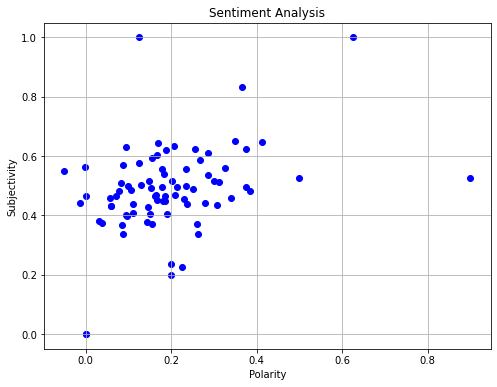

In [45]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge["polarity"],df_doge["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

## From the above plot we see that there are maximum of positive tweets about doge coin.

### Getting the price for dodge coin

In [46]:
import time
import datetime

In [47]:
coin = "DOGE-USD"
period1 = int(time.mktime(datetime.datetime(2014,9,14,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,7,6,23,59).timetuple()))
interval = '1d'
print(period1, period2)

1410757140 1657169940


In [48]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{coin}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [49]:
coin_df = pd.read_csv(query_string)
coin_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
1697,2022-07-03,0.066698,0.067356,0.065111,0.067179,0.067179,280878240
1698,2022-07-04,0.067174,0.069605,0.065927,0.069472,0.069472,379581122
1699,2022-07-05,0.069431,0.069841,0.065697,0.067155,0.067155,403220687
1700,2022-07-06,0.067172,0.069058,0.066448,0.068583,0.068583,398926503


In [50]:
coin_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [53]:
df_doge.dtypes

Date            datetime64[ns]
Tweet                   object
subjectivity           float64
polarity               float64
Sentiment               object
dtype: object

In [54]:
coin_df['Date'] = pd.to_datetime(coin_df['Date'], format='%Y-%m-%d')

In [55]:
coin_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [56]:
joint_df = pd.merge(df_doge,coin_df, how = "left", left_on=["Date"], right_on=["Date"])
joint_df

,Date,Tweet,subjectivity,polarity,Sentiment,Open,High,Low,Close,Adj Close,Volume
0,2019-04-02,TrevMcKendrick Nouniversalsci What could possibly go wrongklodua universalsci Some challenges with ice formation in the cryogenic propellant prevalves Hopefully overcome soonYupTomHeats Dogecoin might be my fav cryptocurrency Its pretty cooldogecoin Uh ohDogecoin rulz httpstcoflWWUgAgLUDogecoin value may vary httpstcoUWerAhPv63,1.000000,0.125000,Positive,0.002459,0.002863,0.002394,0.002795,0.002795,60298362
1,2020-04-25,alexanderbittan shelbiestrykers YesRenataKonkoly YesPPathole alexanderbittan shelbiestrykers Not saying new Giga will be in Texas but Cybertruck will be produced there wherever it is as Fremont is at max capacityKristennetten PPathole alexanderbittan shelbiestrykers Needs to be more than halfway to east coastDMCRyan RenataKonkoly Sure we can probably do an update later this yearcleantechnica Many talented engineers are working on FSD at Tesla What matters is solving vision at high frame rate in our compute space with low latency between camera frame amp actuationthirdrowtesla cleantechnica Definitelyjgrano305 thirdrowtesla cleantechnica Progress is goodPPathole Pretty much Being better than human drivers on average is not a super high standard Autonomy will probably be held to a 300 to 1000 higher safety requirement longtermRenataKonkoly Erdayastronaut SpaceX Its also because of the Spitfire engine amp wizardjhcsquared AlexBrendel2 Erdayastronaut As usual for most things building production system for Raptor is gt1000 harder than designing itPPathole Great labeling tools amp talented human labelers really matter It really is a skilled profession Importance of good tools amp infrastructure is underratedBocaChicaGal NASASpaceflight These wont be strictly coupled to ship serial number Might be on SN5 or might just be used as a manufacturing pathfinderbrendan2908 BocaChicaGal NASASpaceflight Improved process I was referring to was cylinder to cylinder circumferential welds to improve cycle time amp reduce pucker Those are still working their way through productionSo often true httpstcoqxmDtZ4Bufjustpaulinelol That basically describes SoC 0 vs SoC 1 of our FSD computer right now Soon to changeyourfavgas justpaulinelol No good chance of RUD rapid unscheduled disassembly event but landing pad is separated from launch padCBSNewYork AielloTV Heard same from doc I trustharshairugu PPathole CBSNewYork AielloTV Great28delayslater justpaulinelol Dogecoin ModeSamTalksTesla 28delayslater justpaulinelol Romance Mode httpstconc735SsMpM,0.456694,0.229180,Positive,0.002102,0.002146,0.002087,0.002142,0.002142,229810398
2,2020-07-18,ThankswintonARK We better hustle with Neuralink Not moving fast enoughModelYendofICE wintonARK Pretty muchWill those who write the algorithms ever realize their negativity biasizzynobre Excuse me I only sell DogeIts inevitable httpstcoeBKnQm6QyFPPathole Summarizes pretty much every biz school case studyserhatserhatst ManyIf youve solved hard problems with phones wearables sealing signal processing inductive charging power mgmt etc please consider working at engineeringneuralinkcomSolving highvolume highreliability lowcost production problems is especially valuedPPathole No prior neuroscience background is required This is primarily an electricalelectronic chip designmechanicalsoftware engineering problem for the Link itself amp the surgical robotflcnhvy Yesm4ttwegner flcnhvy How come Hulk never loses pantsm4ttwegner flcnhvy BDEm4ttwegner flcnhvy,0.576282,0.123718,Positive,0.003060,0.003629,0.003031,0.003473,0.003473,204080851
3,2020-11-17,PPathole michaelminalab YesErdayastronaut rweb11742 Damn thats not easy I spent quite a bit of time looking at RussianUkrainian engines Theyre goodtrylolli MaisieWilliams httpstcoUWerAhxUevjack Well saidJohnnaCrider1 timmerenginerd jack Fate IronyChrisGNSF Special permission received from Stonecutters Guild httpstcoSW5RBm1sRBGreenIsClutch JohnnaCrider1 timmerenginerd jack They